<a href="https://colab.research.google.com/github/PatriciaRoxana/Big-data-lab1/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#integrantes:Matías José Rivadeneira , Donato Nicolas Miguel y Ríos patricia Roxana.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



In [66]:

arch = '/content/drive/MyDrive/big data/Laboratorio 2/Canciones_Spotify.csv'
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(arch)

df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [67]:
df1= df.copy()

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [69]:

# Convertir datos no numéricos en NaN
df1['target'] = pd.to_numeric(df1['target'], errors='coerce')

# Eliminar filas con NaN en 'target', en este caso no posee
df1.dropna(subset=['target'])


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [70]:
# Dividir los datos en características 'X' y la variable objetivo 'y'
#y quita las columnas que no son clave para saber si un tema gusta o no
#ya que pueden afectar negativamente al resultado, y target que es la que se desea predecir.
X = df1.drop(["Unnamed: 0","key","mode","duration_ms","time_signature","target", "song_title", "artist"], axis=1)
y = df1["target"]

knn

In [71]:
# Dividir los datos en conjuntos de entrenamiento y prueba
#test_size=0.3 significa que el 30% de los datos se utilizarán para prueba y el resto para entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar las características para que tengan una escala similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN
knn_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 71.45%


El hiperparámetro k en K-Nearest Neighbors (KNN) determina el número de vecinos más cercanos a considerar cuando se hace una predicción para un punto de datos nuevo.k está configurado a 5 lo cual significa que para cada punto de datos en el conjunto de prueba, el algoritmo busca los 5 vecinos más cercanos en el conjunto de entrenamiento para determinar la etiqueta más común entre esos vecinos.

La elección del valor de k puede tener un impacto significativo en el rendimiento del modelo:

Valores pequeños de k (como 1 o 2) pueden llevar a un modelo que se ajusta demasiado a los datos de entrenamiento (overfitting). Esto significa que el modelo será muy sensible al ruido presente en el conjunto de entrenamiento, y podría tener un rendimiento pobre en el conjunto de prueba debido a su a que no puede generalizar bien.

Valores grandes de k aumentan la influencia de los vecinos y por lo tanto, el modelo se vuelve más resistente al ruido. Sin embargo, un valor muy grande puede llevar a un modelo que es demasiado general (underfitting), ignorando las estructuras que podrían ser importantes para la clasificación.

Valores intermedios de k suelen ser los que proporcionan el mejor equilibrio entre el sesgo y la varianza.

Con una precisión del modelo del 71.45%, hay varias posibilidades:

k=5 es el mejor valor encontrado,k no solo es óptimo para un particular conjunto de entrenamiento/prueba, sino que también es robusto y generaliza bien a nuevos datos.

In [72]:
# Pide al usuario que ingrese el número de índice para predecir si le gusta o no
indice = int(input("Ingresa el número de índice: "))

# Verifica si el índice es válido
if indice >= 0 and indice < len(df):
    # Extrae las columnas especificadas en un array
    caracteristicas_cancion = df.loc[indice, ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]].to_numpy()

    nueva_cancion = [caracteristicas_cancion]  # Proporciona las características de la nueva canción
    nueva_cancion = scaler.transform(nueva_cancion)  # Normaliza las características
    prediccion = knn_classifier.predict(nueva_cancion)

    # Extrae el título (song_title)
    titulo = df.loc[indice, "song_title"]
    artista = df.loc[indice, "artist"]

    print("La canción:", titulo, "de ", artista)
    if prediccion[0] == 1:
        print("podría ser del agrado del usuario.")
    else:
        print("podría no ser del agrado del usuario.")

else:
    print("El índice ingresado no es válido. Debe estar en el rango [0, {}]".format(len(df) - 1))

Ingresa el número de índice: 8
La canción: I've Seen Footage de  Death Grips
podría ser del agrado del usuario.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [73]:
# Crear un objeto figura para el gráfico
fig = go.Figure()

# Iterar sobre la lista de datos y agregar cada mes al objeto figura 'fig'
fig.add_trace(go.Scatter(
    x=X_train,  # Eje X: Horas del día
    y=y_train,  # Eje Y: Datos de ventas por hora para este mes
    mode='markers',  # Tipo de gráfico: líneas
    name="target",  # Etiqueta para la leyenda del gráfico
    line=dict(width=2, shape='spline'),  # Configuración de las líneas del gráfico
    marker=dict(size=10)  # Configuración de las marcas del gráfico
))

# Mostrar el gráfico
fig.show()


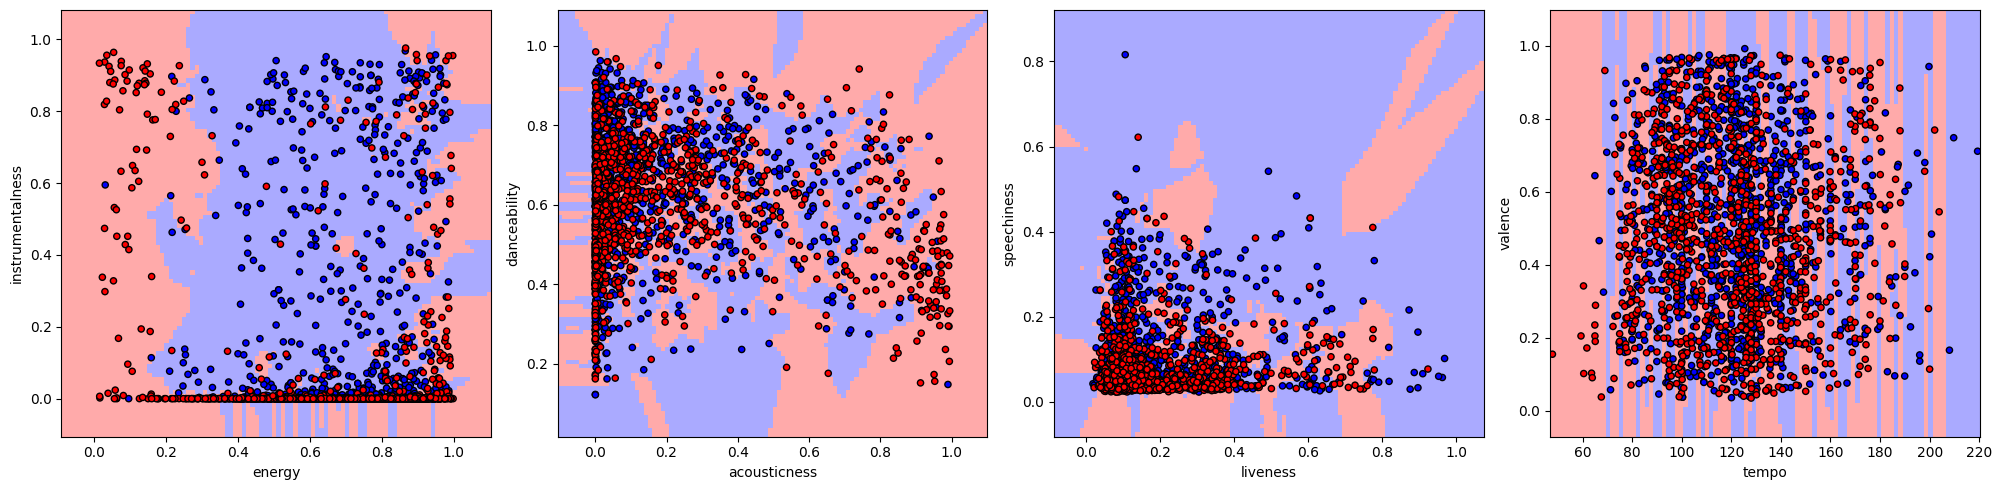

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

li = [
    ("energy", "instrumentalness"),
    ("acousticness", "danceability"),
    ("liveness", "speechiness"),
    ("tempo", "valence")
]

def visualize_classification(df1, x_feature, y_feature, ax):
    # Colores para las áreas y puntos
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Extraer datos relevantes
    X = df1[[x_feature, y_feature]].values
    y = df1['target'].values

    # Crear y entrenar un nuevo modelo KNN con solo las dos características
    knn = KNeighborsClassifier(n_neighbors=3)#mejor valor
    knn.fit(X, y)

    # Límites para los ejes x e y
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predecir para cada punto en la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las fronteras
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Graficar los puntos
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.axis('tight')

# Crear una figura para los subplots
fig, axs = plt.subplots(nrows=1, ncols=len(li), figsize=(20, 5))

# Graficar cada par de características
for (x_feature, y_feature), ax in zip(li, axs):
    visualize_classification(df1, x_feature, y_feature, ax)

plt.tight_layout()
plt.show()


Fronteras de Decisión:Las áreas coloreadas en el gráfico representan las fronteras de decisión predichas por el modelo KNN, donde cada color corresponde a una clase diferente.
Datos de Entrada:Hiperparámetro k:El valor de n_neighbors está fijado en 3, lo que significa que para cada clasificación, el modelo KNN considera los 3 vecinos más cercanos, el mejor valor obtenido para este caso.
Análisis de los Resultados: diferencia bien entre clases para algunas características (como "energy" y "instrumentalness"), pero no tan bien para otras (como "liveness" y "speechiness"), pueden ser caracteristicas que no ayudan a la prediccion del caso.

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#funcion para diferentes metricas
def plot_knn_metrics(X, y, clf_KNN, metric='accuracy', k_range=range(1, 20), test_size=0.3, average='macro'): # en este caso se uso solo macro q es el mas utilizado

    metrics_functions = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score
    }

    if metric not in metrics_functions:
        raise ValueError(f"Métrica '{metric}' no reconocida. Elige entre: {', '.join(metrics_functions.keys())}.")

    if metric in ['precision', 'recall', 'f1']: ##SI SON ESTE TIPO DE METRICAS Q LE APLIQUE MACRO DIRECTAMENTE
        metric_function = lambda y_true, y_pred: metrics_functions[metric](y_true, y_pred, average=average)
    else:
        metric_function = metrics_functions[metric]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)#SEPARA ENTRE ENTRENAM Y PRUEBA

    train_scores = []
    test_scores = []

    for k in k_range:#AUMENTA EL K DENTRO DE K RANGE
        knn = clf_KNN(n_neighbors=k)  # PRIMERO K VALE 1
        knn.fit(X_train, y_train.ravel()) # ENTRENA CON K 1

        y_train_pred = knn.predict(X_train)  #CALCULA LOS PRED DEL TRAIN Y TEST
        y_test_pred = knn.predict(X_test)

      #CALCULA Y ARMA UN ARREGLO CON LOS SCORES DE ENTRENAMIENTO Y TESTEO DE LAS METRICAS Q LE PEDI EN METRIC FUCTION
        train_scores.append(metric_function(y_train, y_train_pred))
        test_scores.append(metric_function(y_test, y_test_pred))
#MOSTRAR
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, train_scores, label=f'Training {metric.capitalize()}')
    plt.plot(k_range, test_scores, label=f'Testing {metric.capitalize()}')

    plt.legend()
    plt.title(f'{metric.capitalize()} vs. Número de Vecinos')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()



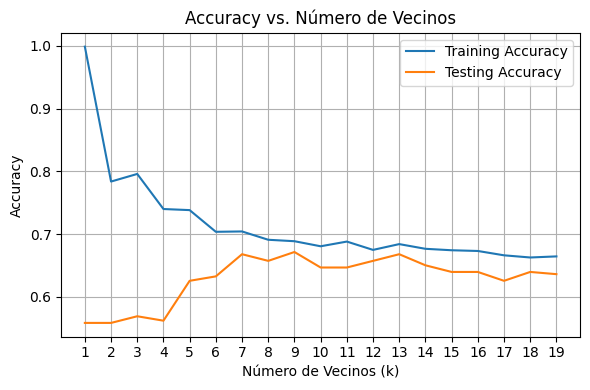

In [76]:
#grafico con accuracy
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.14)

Overfitting con Pocos Vecinos:
k es 1, el clasificador tiene uanbrecha muy amplia lo que indica overfitting.
k aumenta, la exactitud en el conjunto de entrenamiento disminuye, pero la exactitud en el conjunto de prueba mejora hasta cierto punto. Esto indica que el modelo está generalizando mejor y no está simplemente memorizando los datos de entrenamiento.
aumentar k no mejora significativamente la exactitud en el conjunto de prueba y comienza a estabilizarse. Esto puede indicar que se ha alcanzado un equilibrio entre el sesgo y la varianza del modelo.
Elección del k Óptimo: después del pico inicial de sobreajuste cuando k = 1, la exactitud de prueba aumenta a medida que K se incrementa y luego se estabiliza. Parece haber una meseta o un ligero pico en la exactitud de prueba, que comienza alrededor de k = 5 y se extiende hasta aproximadamente k = 11 o k = 12 , después de lo cual la exactitud de prueba se estabiliza o disminuye ligeramente. El valor óptimo de k parece estar alrededor de k = 13, donde la exactitud de prueba es relativamente alta y consistente, y la brecha con la exactitud de entrenamiento no es tan grande.


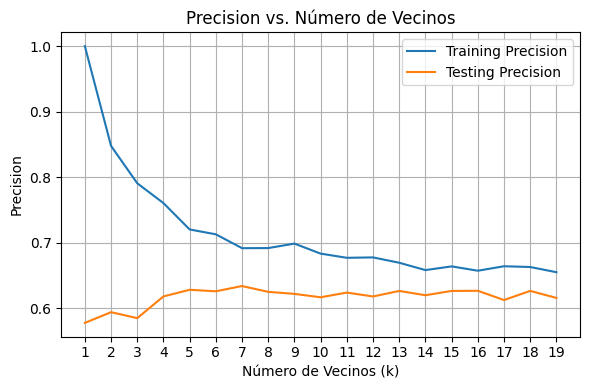

In [77]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'precision',test_size=0.5)

Visualmente, el mejor k podría estar alrededor de k=7 a k=13, donde la línea de precisión de prueba parece más plana antes de disminuir. Este rango de k parece proporcionar una buena compensación entre la precisión de entrenamiento y de prueba.

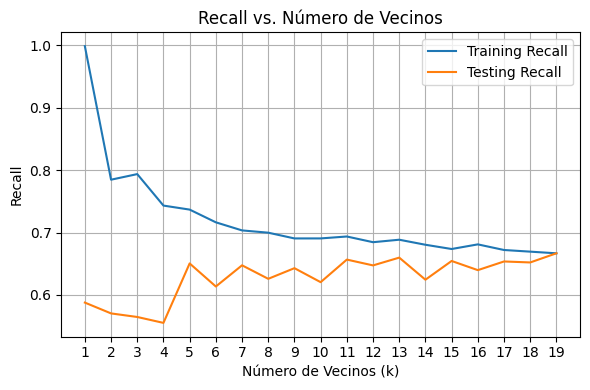

In [78]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'recall',test_size=0.1)

Elección del Valor de k:Basándonos en el recall de prueba, el valor óptimo de k parece estar entre k=11 y k=19, ya que el recall de prueba se mantiene relativamente constante en este rango. Sin embargo, a diferencia de la precisión y la exactitud.

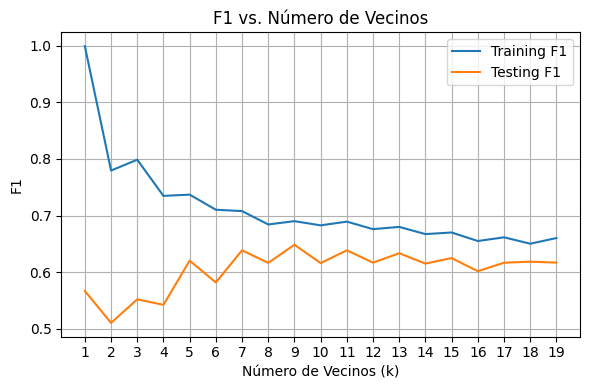

In [79]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'f1',test_size=0.3)

Dado que el F1 score es una métrica que busca un equilibrio entre la precisión y el recall, un valor de k que maximiza el F1 score es deseable cuando se valora tanto la capacidad del modelo para recuperar positivos verdaderos recall como para ser preciso en sus predicciones positivas precisión.  F1 score parece ser alrededor de 5, ya que proporciona el mejor equilibrio entre precisión y recall para los datos de prueba

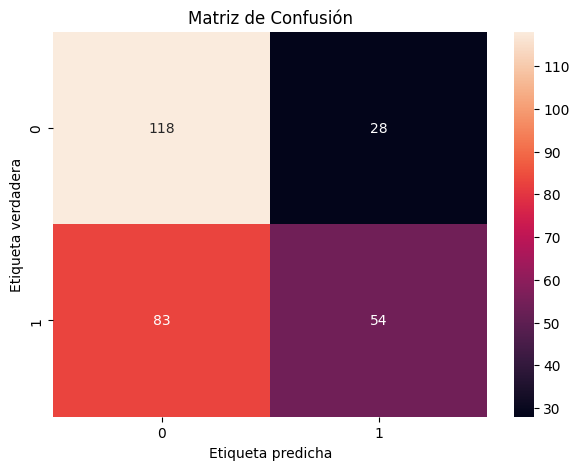


Accuracy: 0.607773851590106
Precision (macro): 0.6228006309913845
Recall (macro): 0.6011898810118989
F1 Score (macro): 0.5866329793533616


In [80]:
def generate_clf_KNN(k, X_train, y_train):  #funcion que mete las 2 lineas de entrenamiento de arriba, le paso el k y los datos de entrenamiento
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    clasificadorKNN.fit(X_train, y_train.ravel())
    return clasificadorKNN
X = df1.drop(columns=['target', 'song_title', 'artist', 'Unnamed: 0','time_signature','loudness','duration_ms','mode','key']) .values #caracteristicas
y = df1['target'].values

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=30)
clasificadorKNN1 = generate_clf_KNN(2,X_train, y_train)


y_pred = clasificadorKNN1.predict(X_test)
c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
print("")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro')}")



Métricas de Rendimiento:
Accuracy (Exactitud): Aproximadamente 0.608, lo que significa que alrededor del 60.8% de todas las predicciones fueron correctas.
Precision (Precisión) Macro: Aproximadamente 0.623, lo que indica que el modelo tiene un rendimiento promedio del 62.3% en la predicción correcta de cada clase.
Recall (Sensibilidad) Macro: Aproximadamente 0.601, lo que sugiere que el modelo identifica el 60.1% de todas las instancias positivas reales en promedio para cada clase.
F1 Score Macro: Aproximadamente 0.587, que es una media armónica de la precisión y el recall y es útil cuando se necesita un balance entre estas dos métricas.

svm

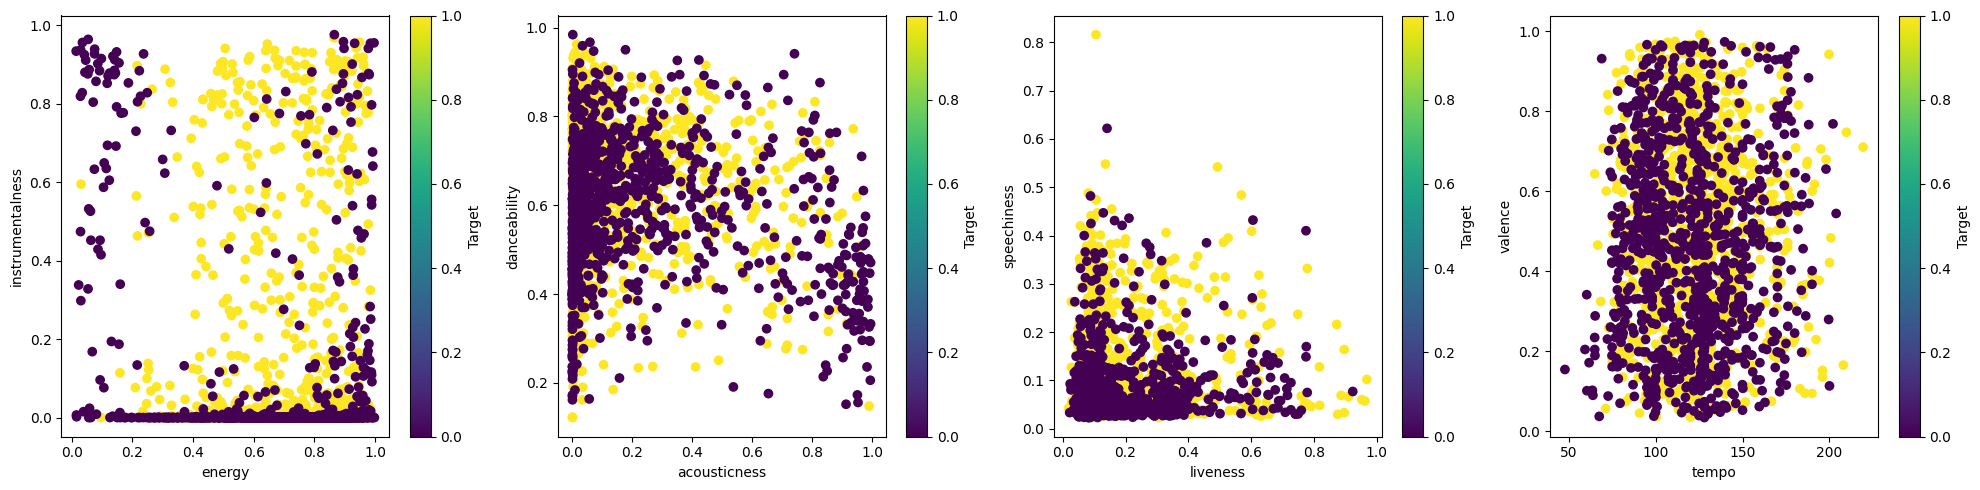

In [81]:
import matplotlib.pyplot as plt

# Lista de columnas para x e y
li = [
    ( "energy","instrumentalness"),
    ("acousticness", "danceability"),
    ("liveness", "speechiness"),
    ("tempo", "valence")
]

# Crear la figura
plt.figure(figsize=(20, 5))

# itera sobre cada par de columnas
for i, (x_column, y_column) in enumerate(li, 1):  # i empieza en 1
    # Crear un subplot
    plt.subplot(1, 4, i)  # 1 fila, 4 columnas, índice i

    # Crear scatter plot
    plt.scatter(df1[x_column], df1[y_column], c=df1['target'])

    # Agregar colorbar
    plt.colorbar(label='Target')

    # Etiquetas
    plt.xlabel(x_column)
    plt.ylabel(y_column)

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()



In [82]:
# Separar las variables (X) del objetivo/target (y)
X = df1.drop(columns=['target', 'song_title', 'artist', 'Unnamed: 0','time_signature','loudness','duration_ms','mode','key']).values  # Eliminamos las columnas no numéricas y target
y = df1['target']

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos en entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=35) #mejor accuracy
# Modelo SVM
kernels = ['linear', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))


Accuracy using linear: 0.6584158415841584
Accuracy using rbf: 0.7277227722772277


Rendimiento del Modelo: El modelo SVM con el kernel RBF supera en rendimiento al modelo con el kernel lineal, según la métrica de exactitud.
Selección del Kernel:Los datos pueden no ser linealmente separables en el espacio de características original, lo que justificaría el mejor rendimiento del kernel RBF, que puede manejar mejor la separación en espacios de alta dimensión mediante la transformación no lineal de los datos.
Validación del Modelo: Se ha utilizado una separación de los datos con un tamaño de conjunto de prueba del 10% y una semilla de aleatorización (random state) de 35, lo que ha producido la mayor exactitud observada.

Kernel: linear C: 0.1 Gamma: 0.1
Kernel: linear C: 0.1 Gamma: 1
Kernel: linear C: 0.1 Gamma: 10
Kernel: rbf C: 0.1 Gamma: 0.1
Kernel: rbf C: 0.1 Gamma: 1
Kernel: rbf C: 0.1 Gamma: 10
Kernel: linear C: 1 Gamma: 0.1
Kernel: linear C: 1 Gamma: 1
Kernel: linear C: 1 Gamma: 10
Kernel: rbf C: 1 Gamma: 0.1
Kernel: rbf C: 1 Gamma: 1
Kernel: rbf C: 1 Gamma: 10
Kernel: linear C: 10 Gamma: 0.1
Kernel: linear C: 10 Gamma: 1
Kernel: linear C: 10 Gamma: 10
Kernel: rbf C: 10 Gamma: 0.1
Kernel: rbf C: 10 Gamma: 1
Kernel: rbf C: 10 Gamma: 10


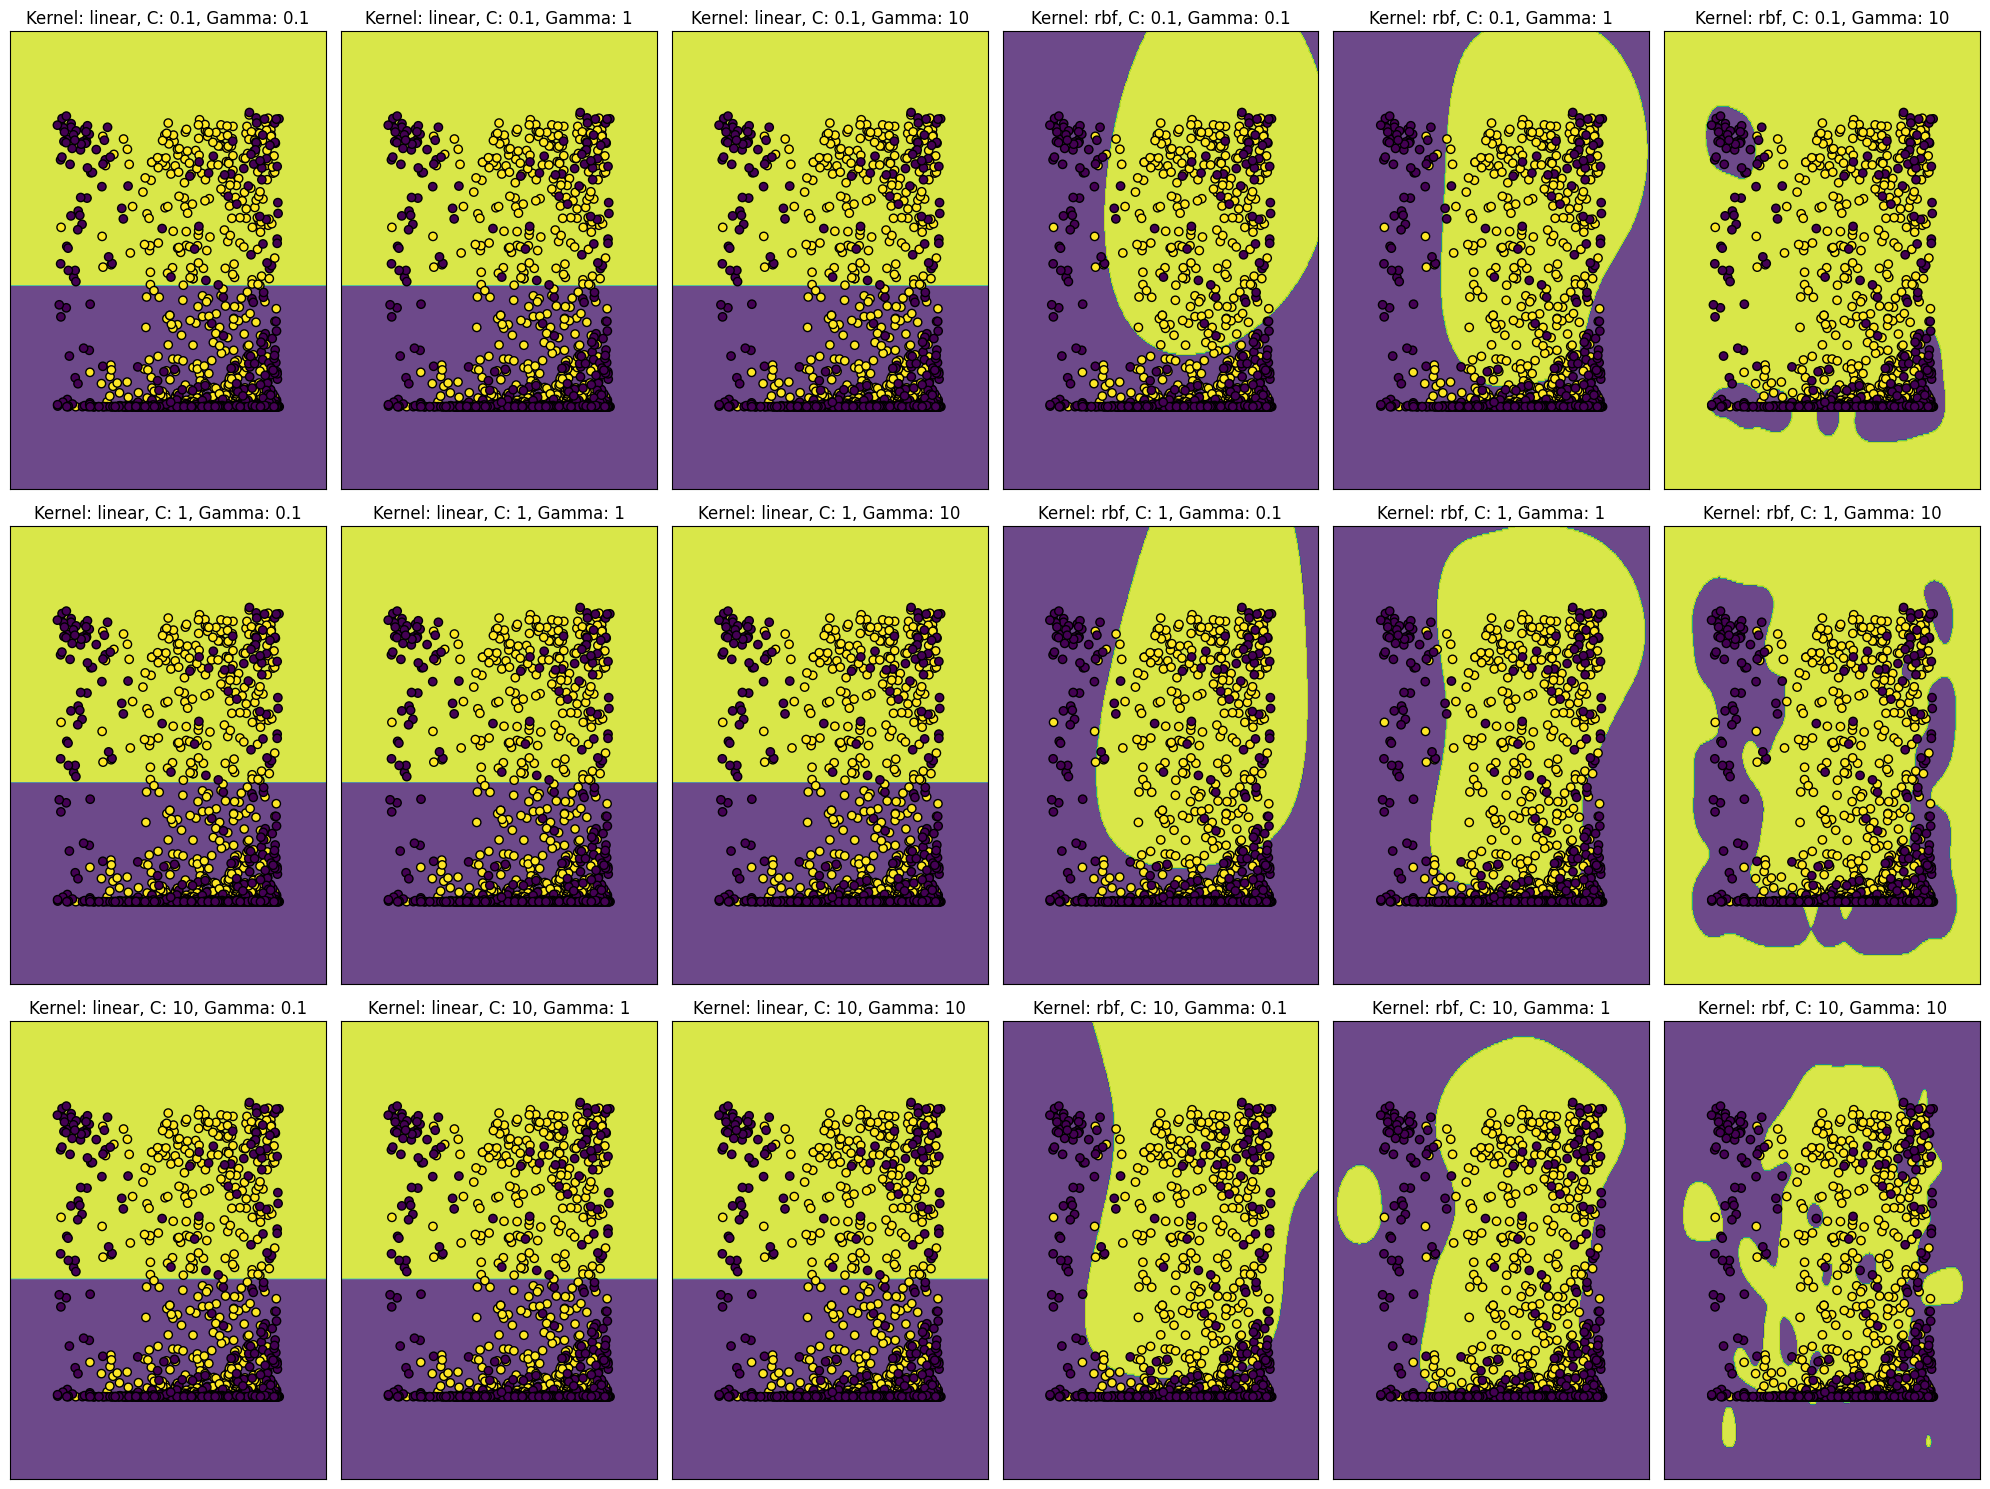

In [83]:

# Seleccionamos las características y el target que mejor agrupan las clases
X = df1[["energy","instrumentalness"]].values
y = df1['target'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
# # Separar los datos
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Función para graficar la frontera de decisión
def plot_decision_boundary(clf, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)
#probando diferentes valores de gama y c
kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1,10]

fig, axes = plt.subplots(nrows=len(C_values), ncols=len(gamma_values) * len(kernels), figsize=(20,15))

for i, C_val in enumerate(C_values):
    for k, kernel in enumerate(kernels):
        for j, gamma_val in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C_val, gamma=gamma_val)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("Kernel:", kernel, "C:", C_val, "Gamma:", gamma_val)

            col_index = j + k * len(gamma_values)
            title = ('Kernel: {}, C: {}, Gamma: {}'.format(kernel, C_val, gamma_val))
            plot_decision_boundary(model, X, y, axes[i, col_index], title)
            axes[i, col_index].set_xticks(())
            axes[i, col_index].set_yticks(())

plt.tight_layout()
plt.show()


In [84]:
#SCORE SOLO CON LOS DATOS DE ENTRENAM SIN VALIDACION CRUZDA
#con metodo GridSearchCV
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]} #dic con dif c, gama y k
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro')

clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)


Mejores parámetros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor score: 0.6332361690968293


In [85]:
# MEJOR SCORE CON CROS VALIDATION

svc = SVC()


param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}


grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')#CROS VALIDATION DE 5, SEGUN LA VALIDACION BUSQ EL MEJOR ACURACY
grid_search.fit(X_train, y_train)


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor score: 0.6441301463377114


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.57      0.83      0.67       186
           1       0.76      0.45      0.57       218

    accuracy                           0.63       404
   macro avg       0.66      0.64      0.62       404
weighted avg       0.67      0.63      0.62       404



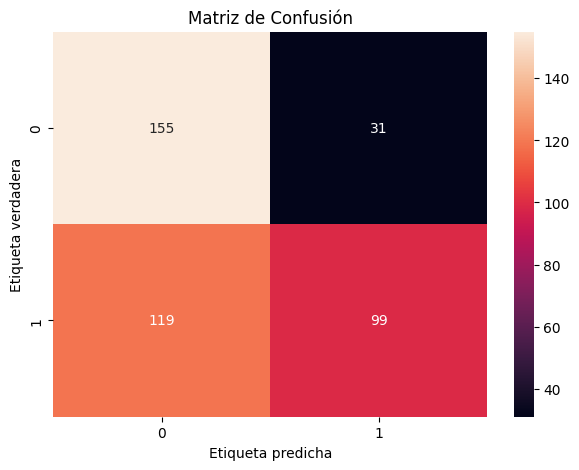

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svc_best = SVC(C=10, gamma=10, kernel='rbf')#se entrena con esos paramet
svc_best.fit(X_train, y_train)#entreno el modelo con los datos de entrenam y de prueba


# generar predicciones
y_pred = svc_best.predict(X_test)

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

# Generación de la matriz de confusión
c = confusion_matrix(y_test, y_pred)

# Obtener etiquetas únicas
class_labels = np.unique(y_test)

# Gráfico de la matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()



Reporte de Clasificación:

Clase 0 (Posiblemente 'No Éxito'):

Precisión: 0.57, indica que el 57% de las instancias clasificadas como clase 0 son correctas.
Recall: 0.83, muestra que el 83% de todas las instancias reales de la clase 0 fueron identificadas correctamente.
F1-score: 0.67, es una métrica que combina precisión y recall, indicando un rendimiento moderadamente bueno para la clase 0.
Clase 1 (Posiblemente 'Éxito'):

Precisión: 0.76, sugiere que el 76% de las instancias clasificadas como clase 1 son correctas.
Recall: 0.45, solo el 45% de todas las instancias reales de la clase 1 fueron identificadas correctamente.
F1-score: 0.57, indica que la clase 1 tiene un rendimiento más bajo que la clase 0 en términos de balance entre precisión y recall.
Promedios:

Exactitud (Accuracy): 0.63, lo que significa que el 63% de todas las predicciones son correctas.
Promedio Macro: Refleja el promedio no ponderado de las métricas para las clases 0 y 1, que es 0.66 para precisión, 0.64 para recall y 0.62 para el F1-score.
Promedio Ponderado: Es similar al promedio macro pero teniendo en cuenta el soporte (número de instancias) para cada clase, dando como resultado 0.67 para precisión y 0.62 para tanto el recall como el F1-score.
Matriz de Confusión:

La matriz muestra el número de predicciones correctas e incorrectas para cada clase:
118 verdaderos positivos (TP) para la clase 0 y 54 verdaderos negativos (TN) para la clase 1.
83 falsos negativos (FN) para la clase 0 y 28 falsos positivos (FP) para la clase 1.

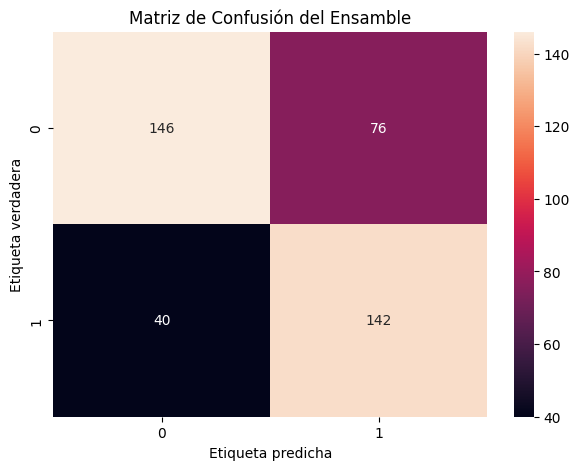

In [87]:
#bagging
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

X = df1.drop(columns=['target', 'song_title', 'artist', 'Unnamed: 0','time_signature','loudness','duration_ms','mode','key']) .values #caracteristicas
y = df1['target'].values

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=32)

# Instanciar y entrenar los modelos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

svm = SVC(C=15, gamma=30, kernel='rbf')
svm.fit(X_train, y_train)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=35)
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Realizar predicciones
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)
naive_bayes_predictions = naive_bayes.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)

# Ensamble con votación mayoritaria
final_predictions = []

for k, s, n, dt, rf in zip(knn_predictions, svm_predictions, naive_bayes_predictions, decision_tree_predictions, random_forest_predictions):
    votes = {0: 0, 1: 0}
    votes[k] += 1
    votes[s] += 1
    votes[n] += 1
    votes[dt] += 1
    votes[rf] += 1  # añadir las votaciones del Random Forest
    majority_vote = max(votes, key=votes.get)
    final_predictions.append(majority_vote)


# Matriz de confusión
c = confusion_matrix(y_test, final_predictions)

# mostrar la matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()


Análisis de la Matriz de Confusión:

Matriz de confusión:

146 Verdaderos Positivos (TP): Instancias de la clase 0 predichas correctamente.
142 Verdaderos Negativos (TN): Instancias de la clase 1 predichas correctamente.
40 Falsos Negativos (FN): Instancias de la clase 1 incorrectamente predichas como clase 0.
76 Falsos Positivos (FP): Instancias de la clase 0 incorrectamente predichas como clase 1.
Conclusiones del Ensamble:

Equilibrio entre clases: El ensamble parece ofrecer un rendimiento relativamente equilibrado en términos de TP y TN. Sin embargo, hay una cantidad significativa de FN y FP.
Tamaño del conjunto de prueba: Con un test_size de 0.20, el conjunto de prueba es lo suficientemente grande como para proporcionar una estimación razonable del rendimiento del modelo.

Votación Mayoritaria: La técnica de ensamble a través de votación mayoritaria es un método robusto que puede mejorar el rendimiento general al combinar las fortalezas de varios modelos.